In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


con = sqlite3.connect('../remote.db')

In [7]:
dimproduct = pd.read_sql_query(f"select * from dimproduct ",con=con)

df = dimproduct.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  569 non-null    int64  
 1   ProductKey             569 non-null    float64
 2   ProductAlternateKey    569 non-null    object 
 3   ProductSubcategoryKey  360 non-null    float64
 4   WeightUnitMeasureCode  245 non-null    object 
 5   SizeUnitMeasureCode    217 non-null    object 
 6   ProductName            569 non-null    object 
 7   StandardCost           358 non-null    float64
 8   FinishedGoodsFlag      569 non-null    float64
 9   Color                  315 non-null    object 
 10  SafetyStockLevel       569 non-null    float64
 11  ReorderPoint           569 non-null    float64
 12  ListPrice              358 non-null    float64
 13  Size                   263 non-null    object 
 14  SizeRange              263 non-null    object 
 15  Weight

In [9]:
df.head()

,index,ProductKey,ProductAlternateKey,ProductSubcategoryKey,WeightUnitMeasureCode,SizeUnitMeasureCode,ProductName,StandardCost,FinishedGoodsFlag,Color,...,Weight,DaysToManufacture,ProductLine,DealerPrice,Class,Style,ModelName,StartDate,EndDate,Status
0,0,1.0,AR-5381,NaN,None,None,Adjustable Race,NaN,0.0,None,...,NaN,0.0,None,NaN,None,None,None,2003-07-01 00:00:00.000000,None,Current
1,1,2.0,BA-8327,NaN,None,None,Bearing Ball,NaN,0.0,None,...,NaN,0.0,None,NaN,None,None,None,2003-07-01 00:00:00.000000,None,Current
2,2,3.0,BE-2349,NaN,None,None,BB Ball Bearing,NaN,0.0,None,...,NaN,1.0,None,NaN,None,None,None,2003-07-01 00:00:00.000000,None,Current
3,3,4.0,BE-2908,NaN,None,None,Headset Ball Bearings,NaN,0.0,None,...,NaN,0.0,None,NaN,None,None,None,2003-07-01 00:00:00.000000,None,Current
4,4,5.0,BL-2036,NaN,None,None,Blade,NaN,0.0,None,...,NaN,1.0,None,NaN,None,None,None,2003-07-01 00:00:00.000000,None,Current


In [4]:
df.groupby('ProductSubcategoryKey').count()

,index,ProductKey,ProductAlternateKey,WeightUnitMeasureCode,SizeUnitMeasureCode,ProductName,StandardCost,FinishedGoodsFlag,Color,SafetyStockLevel,...,Weight,DaysToManufacture,ProductLine,DealerPrice,Class,Style,ModelName,StartDate,EndDate,Status
ProductSubcategoryKey,,,,,,,,,,,,,,,,,,,,,
1.0,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,10,0,10
2.0,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,0,0,0
3.0,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,0,0,0
4.0,14,14,14,0,0,14,14,14,0,14,...,0,14,14,14,14,0,14,14,6,8
5.0,3,3,3,3,0,3,3,3,0,3,...,3,3,0,3,3,0,3,3,0,3
6.0,1,1,1,1,0,1,1,1,1,1,...,1,1,0,1,0,0,1,1,0,1
7.0,1,1,1,0,0,1,1,1,1,1,...,0,1,0,1,0,0,1,0,0,0
8.0,3,3,3,3,0,3,3,3,3,3,...,3,3,0,3,3,0,3,3,0,3
9.0,2,2,2,2,0,2,2,2,2,2,...,2,2,0,2,0,0,2,2,0,2


In [5]:
df.ProductKey.is_unique

True

In [6]:
df.StartDate.notna().sum()

437

In [7]:
df.groupby('ProductKey', as_index = False)['ProductAlternateKey'].count()

,ProductKey,ProductAlternateKey
0,1.0,1
1,2.0,1
2,3.0,1
3,4.0,1
4,5.0,1
...,...,...
564,602.0,1
565,603.0,1
566,604.0,1
567,605.0,1


(array([135.,  63.,  15.,  30.,  10.,  19.,  32.,   9.,   2.,   4.,   6.,
          5.,   5.,  11.,   5.,   0.,   0.,   4.,   0.,   3.]),
 array([8.56500000e-01, 1.09378385e+02, 2.17900270e+02, 3.26422155e+02,
        4.34944040e+02, 5.43465925e+02, 6.51987810e+02, 7.60509695e+02,
        8.69031580e+02, 9.77553465e+02, 1.08607535e+03, 1.19459723e+03,
        1.30311912e+03, 1.41164101e+03, 1.52016289e+03, 1.62868477e+03,
        1.73720666e+03, 1.84572855e+03, 1.95425043e+03, 2.06277231e+03,
        2.17129420e+03]),
 <BarContainer object of 20 artists>)

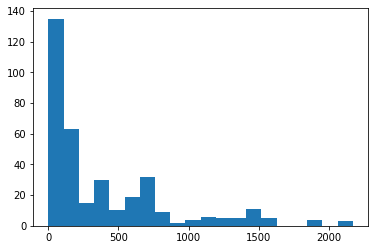

In [8]:
df[['StandardCost']].describe()
plt.hist(df.StandardCost, 20)

(array([130.,  64.,   4.,  41.,  14.,  12.,  20.,  28.,   2.,   4.,   0.,
          6.,  10.,  16.,   0.,   0.,   0.,   0.,   2.,   5.]),
 array([1.3740000e+00, 1.0865340e+02, 2.1593280e+02, 3.2321220e+02,
        4.3049160e+02, 5.3777100e+02, 6.4505040e+02, 7.5232980e+02,
        8.5960920e+02, 9.6688860e+02, 1.0741680e+03, 1.1814474e+03,
        1.2887268e+03, 1.3960062e+03, 1.5032856e+03, 1.6105650e+03,
        1.7178444e+03, 1.8251238e+03, 1.9324032e+03, 2.0396826e+03,
        2.1469620e+03]),
 <BarContainer object of 20 artists>)

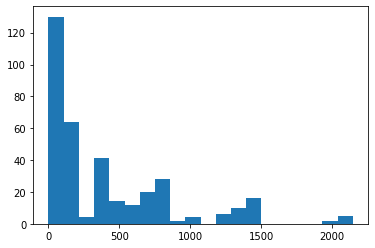

In [9]:
df[['DealerPrice']].describe()
plt.hist(df.DealerPrice, 20)

In [24]:
df.groupby('Status', as_index = False)['ProductKey'].count()



,Status,ProductKey
0,Current,335


<BarContainer object of 119 artists>

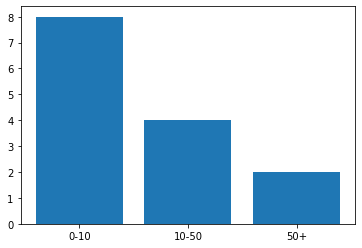

In [25]:
img = df.groupby('Weight', as_index = False)['ProductKey'].count()
img['SizeCat'] = np.where(
    img.Weight < 10,  '0-10', np.where(
        img.Weight < 50, '10-50', '50+'
    ),
)

plt.bar(img.SizeCat, img.ProductKey)

In [31]:

img = df.groupby('SizeRange', as_index = False)['ProductKey'].count()
img

,SizeRange,ProductKey
0,38-40 CM,29
1,42-46 CM,64
2,48-52 CM,62
3,54-58 CM,31
4,60-62 CM,31
5,70.0,1
6,L,14
7,M,14
8,S,12
9,XL,5


In [32]:
img = df.groupby('Size', as_index = False)['ProductKey'].count()
img

,Size,ProductKey
0,38.0,16
1,40.0,13
2,42.0,19
3,44.0,33
4,46.0,12
5,48.0,32
6,50.0,9
7,52.0,21
8,54.0,8
9,56.0,4


In [33]:
img[img['Size'].str.contains('S|M|L|XL')]

,Size,ProductKey
14,L,14
15,M,14
16,S,12
17,XL,5


In [35]:
df[df.Size.isna()]['Size']


0      None
1      None
2      None
3      None
4      None
       ... 
520    None
521    None
563    None
564    None
565    None
Name: Size, Length: 306, dtype: object